## Порядковые статистики

In [1]:
import numpy as np

def return_stats(sample:list) -> tuple:
    sorted_sample = sorted(sample)
    return sorted_sample[0], sorted_sample[2], sorted_sample[6]

return_stats([1.4, 3.02, 3.71, 1.14, 1.66, 0.75, 2.85, 1.07])

(0.75, 1.14, 3.02)

## Группированные статистические ряды. Гистограммы

In [2]:
from bisect import bisect_left
from collections import defaultdict

def return_hist_freq(elements:list, start:int, stop:int, bins: int) -> dict:
    base_intervals = np.linspace(start, stop, bins)
    delta = (stop - start) / (bins - 1)
    result_dict = defaultdict(int)
    
    for elmnt in elements:
        
        boundaries = {
            start: (start, start + delta),
            stop: (stop - delta, stop)
        }
        
        if (elmnt > stop) | (elmnt < start):
            continue
        
        if elmnt in boundaries:
            result_dict[boundaries[elmnt]] += 1
            continue
        
        else:
            index = bisect_left(base_intervals, elmnt)
            interval = (base_intervals[index-1], base_intervals[index])
            result_dict[interval] += 1
    
    return sorted({key: value / len(elements) for key, value in result_dict.items()}.items())


input_list = [18.05, 18.98, 17.6, 16.25, 17.38, 17.38, 17.28, 19.19, 18.01, 16.79, 18.8, 18.45, 19.58, 17.4, 
              17.99, 18.46, 19.23, 15.92, 18.27, 16.7, 18.49, 19.72, 17.99, 19.33, 17.99, 17.69, 17.71, 
              19.24, 17.53, 19.45, 18.16, 17.87, 18.25, 18.7, 18.83, 19.65, 17.01, 17.5, 18.48, 16.17]

return_hist_freq(elements=input_list, start=15, stop=21, bins=9)

[((15.75, 16.5), 0.075),
 ((16.5, 17.25), 0.075),
 ((17.25, 18.0), 0.325),
 ((18.0, 18.75), 0.25),
 ((18.75, 19.5), 0.2),
 ((19.5, 20.25), 0.075)]

## Выборочные характеристики

Какая будет средняя дневная температура июля в Санкт-Петербурге в этом году? Давайте попробуем ответить на этот вопрос на основе исторических данных.  Ниже приводится средняя дневная температура июля в Санкт-Петербурге за 2002-2015 года:
    * 23, 24, 21, 23, 22, 21, 20, 21, 28, 25, 22, 22, 25, 21

Ответить на поставленный вопрос вам помогут следующие выборочные характеристики:
<li> выборочное среднее,
<li> выборочная дисперсия,
<li> выборочная медиана,
<li> первый квартиль,
<li> третий квартиль

In [3]:
from math import ceil, floor

input_data = [23, 24, 21, 23, 22, 21, 20, 21, 28, 25, 22, 22, 25, 21]

n = len(input_data)
variation_range = sorted(input_data)

x_mean = sum(input_data) / n
x_std = sum([(elmnt - x_mean) ** 2 for elmnt in input_data]) / n
x_med = (variation_range[n//2] + variation_range[n//2+1]) / 2 if n // 2 == 0 else variation_range[(n-1)//2]
Q_25 = variation_range[floor(n * 0.25)]
Q_75 = variation_range[floor(n * 0.75)]

print('Выборочное среднее: ', round(x_mean, 2))
print('Выборочная дисперсия: ', round(x_std, 2))
print('Выборочная медиана: ', x_med)
print('Первый квартиль: ', Q_25)
print('Третий квартиль: ', Q_75)

Выборочное среднее:  22.71
Выборочная дисперсия:  4.35
Выборочная медиана:  22
Первый квартиль:  21
Третий квартиль:  24


### Коэффициент корреляции

Найдите выборочный коэффициент корреляции между ростом и весом по данным  измерений роста и веса 10 мужчин. (Единицы измерений рост - см, вес - кг)  

In [5]:
def correl_coef(X:list, Y:list) -> float:
    return (sum(X * Y) / len(X) - np.mean(X) * np.mean(Y)) / (np.std(X) * np.std(Y))

input_data = [(170, 66), (182, 74),  (183, 77),  (180, 72), (175, 67), (181, 77), (187, 76), (181, 77), (178, 72), (187, 76)]
height = np.array([data[0] for data in input_data])
weight = np.array([data[1] for data in input_data])

print('Коэффциент корреляции: ', round(correl_coef(X=height, Y=weight), 2))

Коэффциент корреляции:  0.86


## 13-е число - неудачный день

In [6]:
import pandas as pd

In [7]:
input_data = pd.read_csv('13_6', sep='\t', header=None,
                         names=['type', 'date', 'Friday_6th_amnt', 'Friday_13th_amnt', 'supermarket'])

In [8]:
def return_stats(input_data:list) -> tuple:

    n = len(input_data)
    variation_range = sorted(input_data)
    
    x_mean = sum(input_data) / n
    x_std = sum([(elmnt - x_mean) ** 2 for elmnt in input_data]) / n
    x_med = (variation_range[n//2] + variation_range[n//2+1]) / 2 if n // 2 == 0 else variation_range[(n-1)//2]
    
    return x_mean, x_std, x_med

def return_central_moment(input_data:list, order:int) -> float:
    mu_i = sum([(elmnt - input_data.mean()) ** order for elmnt in input_data]) / len(input_data)
    
    return mu_i

In [9]:
x_mean, x_std, x_med = return_stats(input_data['Friday_13th_amnt'].values)

print('Объем выборки: ', input_data.shape[0])
print('Выборочное среднее: ', round(x_mean, 1))
print('Выборочная дисперсия: ', round(x_std, 1))
print('Выборочная медиана: ', x_med)

Объем выборки:  45
Выборочное среднее:  5017.0
Выборочная дисперсия:  1345096.1
Выборочная медиана:  4736


<p>Коэффициент ассиметрии:
<li> Неформально говоря, коэффициент асимметрии положителен, если правый хвост распределения длиннее левого, и отрицателен в противном случае.
<li> Если распределение симметрично относительно математического ожидания, то его коэффициент асимметрии равен нулю.
<br>
<br>
<p> Коэффициент эксцесса:
<li> Нормальное распределение имеет нулевой эксцесс
<li> Если хвосты распределения «легче», а пик острее, чем у нормального распределения, то коэффициент положителен
<li> Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент отрицательный

In [10]:
input_data['difference'] = input_data['Friday_13th_amnt'] - input_data['Friday_6th_amnt']

asymmetric_coef = return_central_moment(input_data['difference'], 3) \
                  / (return_central_moment(input_data['difference'], 2) ** (3/2))

curtosis = return_central_moment(input_data['difference'], 4) \
                 / (return_central_moment(input_data['difference'], 2) ** 2) - 3

print('Выборочное среднее: ', round(input_data['difference'].mean(), 2))
print('Коэффициент асимметрии: ', round(asymmetric_coef, 2))
print('Коэффициент эксцесса: ', round(curtosis, 2))

Выборочное среднее:  46.49
Коэффициент асимметрии:  1.47
Коэффициент эксцесса:  4.96


### Построим ящик с усами для признаков и гистограммы

In [11]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ceil', 'floor']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


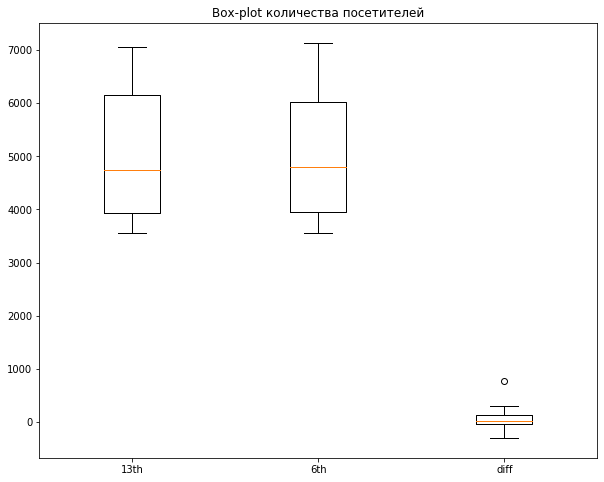

In [12]:
my_dict = {'13th': input_data['Friday_13th_amnt'].values,
           '6th': input_data['Friday_6th_amnt'].values,
          'diff': input_data['difference'].values,
          }

fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.title('Box-plot количества посетителей')
plt.show()

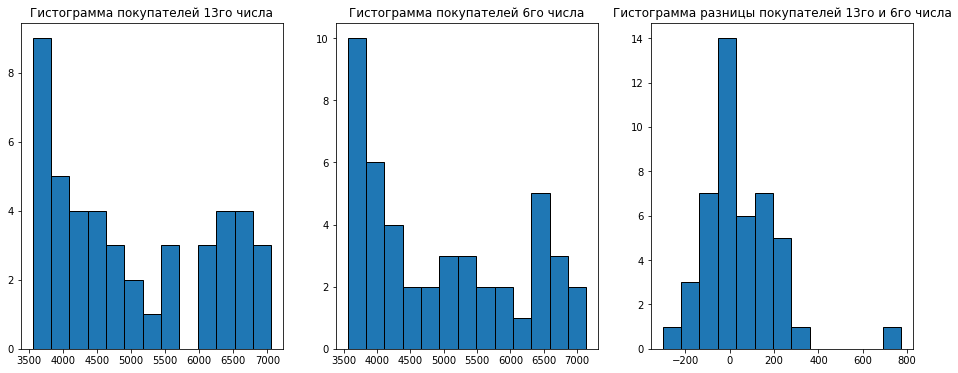

In [13]:
# Эмпирическое правило Стерждеса
n_bins = int(1 + floor(3.332 * np.log(input_data.shape[0])))

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
ax[0].hist(input_data['Friday_13th_amnt'], bins=n_bins, edgecolor='black')
ax[0].set_title('Гистограмма покупателей 13го числа')
ax[1].hist(input_data['Friday_6th_amnt'], bins=n_bins, edgecolor='black')
ax[1].set_title('Гистограмма покупателей 6го числа')
ax[2].hist(input_data['difference'], bins=n_bins, edgecolor='black')
ax[2].set_title('Гистограмма разницы покупателей 13го и 6го числа')
plt.show()

## Сравнение колледжей

In [14]:
college_data = pd.read_csv('colleges.txt', sep='\t')
college_data.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


Формат файла
<li> School -  название школы
<li> School_Type - тип школы (школа искусств  'LibArts', исследовательский университет 'Univ')
<li> SAT - медиана объединенных значений Math и Verbal SAT  студентов
<li> Acceptance: - % принятых абитуриентов
<li> $/Student  -  Деньги, расходуемые на одного студента в среднем
<li> Top 10% -  % студентов в топ 10% выпускных классов
<li> %PhD -  %  факультетов, имеющих PhD
<li> Grad%: % студентов, которые успешно завершили обучение

In [15]:
art_faculty = college_data.loc[college_data['School_Type'] == 'Lib Arts'].copy()
university = college_data.loc[college_data['School_Type'] == 'Univ'].copy()

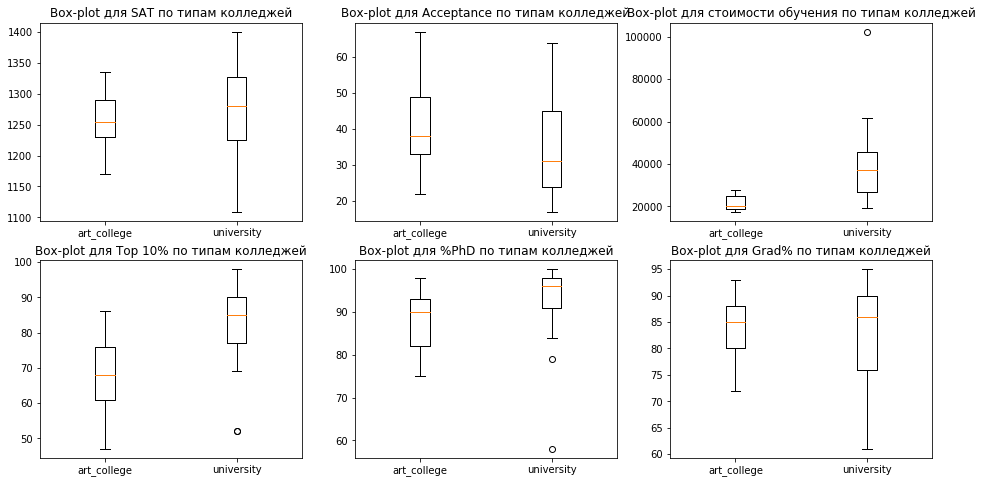

In [16]:

fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ax[0][0].boxplot([art_faculty['SAT'].values, university['SAT'].values])
ax[0][0].set_xticklabels(['art_college', 'university'])
ax[0][0].set_title('Box-plot для SAT по типам колледжей')

ax[0][1].boxplot([art_faculty['Acceptance'].values, university['Acceptance'].values])
ax[0][1].set_xticklabels(['art_college', 'university'])
ax[0][1].set_title('Box-plot для Acceptance по типам колледжей')

ax[0][2].boxplot([art_faculty['$/Student'].values, university['$/Student'].values])
ax[0][2].set_xticklabels(['art_college', 'university'])
ax[0][2].set_title('Box-plot для стоимости обучения по типам колледжей')

ax[1][0].boxplot([art_faculty['Top 10%'].values, university['Top 10%'].values])
ax[1][0].set_xticklabels(['art_college', 'university'])
ax[1][0].set_title('Box-plot для Top 10% по типам колледжей')

ax[1][1].boxplot([art_faculty['%PhD'].values, university['%PhD'].values])
ax[1][1].set_xticklabels(['art_college', 'university'])
ax[1][1].set_title('Box-plot для %PhD по типам колледжей')

ax[1][2].boxplot([art_faculty['Grad%'].values, university['Grad%'].values])
ax[1][2].set_xticklabels(['art_college', 'university'])
ax[1][2].set_title('Box-plot для Grad% по типам колледжей')

plt.show()

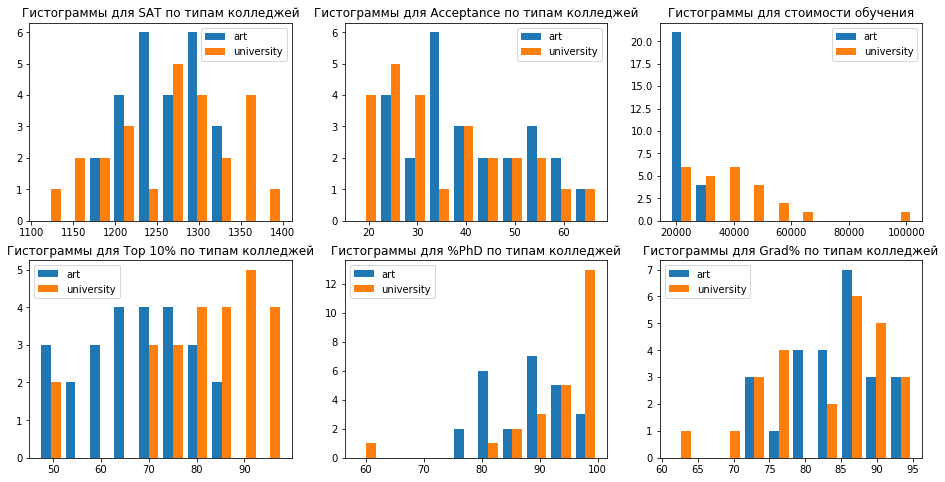

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ax[0][0].hist([art_faculty['SAT'].values, university['SAT'].values])
ax[0][0].legend(['art', 'university'])
ax[0][0].set_title('Гистограммы для SAT по типам колледжей')

ax[0][1].hist([art_faculty['Acceptance'].values, university['Acceptance'].values])
ax[0][1].legend(['art', 'university'])
ax[0][1].set_title('Гистограммы для Acceptance по типам колледжей')

ax[0][2].hist([art_faculty['$/Student'].values, university['$/Student'].values])
ax[0][2].legend(['art', 'university'])
ax[0][2].set_title('Гистограммы для стоимости обучения')

ax[1][0].hist([art_faculty['Top 10%'].values, university['Top 10%'].values])
ax[1][0].legend(['art', 'university'])
ax[1][0].set_title('Гистограммы для Top 10% по типам колледжей')

ax[1][1].hist([art_faculty['%PhD'].values, university['%PhD'].values])
ax[1][1].legend(['art', 'university'])
ax[1][1].set_title('Гистограммы для %PhD по типам колледжей')

ax[1][2].hist([art_faculty['Grad%'].values, university['Grad%'].values])
ax[1][2].legend(['art', 'university'])
ax[1][2].set_title('Гистограммы для Grad% по типам колледжей')

plt.show()

In [18]:
accept_univ = sorted(university['Acceptance'].values)
Q3 = accept_univ[int(floor(len(accept_univ) * 0.75))]


print('Выборочное среднее SAT школ искусств: ', art_faculty['SAT'].mean())
print('3й выборочный квартиль Acceptance университетов: ', Q3)
print('Название института(колледжа), в котором тратят денег в среднем на одного \
студента больше, чем в других институтах(колледжах): ',
      university.loc[university['$/Student'] == university['$/Student'].max()]['School'].values[0])

Выборочное среднее SAT школ искусств:  1256.64
3й выборочный квартиль Acceptance университетов:  45
Название института(колледжа), в котором тратят денег в среднем на одного студента больше, чем в других институтах(колледжах):  Cal Tech
